In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

import os

In [70]:
filter_order = ['g','r','i','z','y']
image_lowres = np.load('data/sdss_npy_images/299489677444933632.npy', allow_pickle=True)
image_highres = np.load('data/sdss_npy_images/temp/299489677444933632.npy', allow_pickle=True)
print(image_lowres.shape, image_highres.shape)

(5, 64, 64) (5, 224, 224)


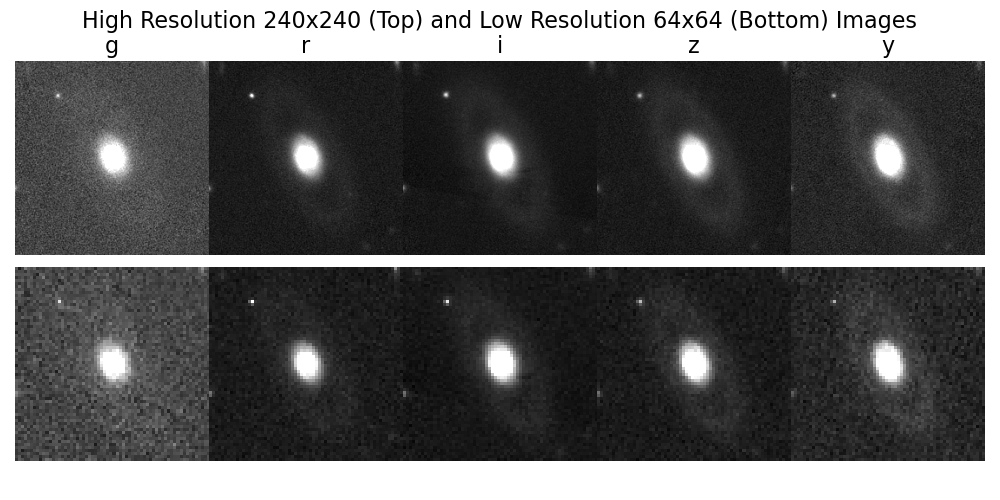

In [71]:
%matplotlib widget

fig = plt.figure(figsize=(10, 5), dpi=100)
subfigs = fig.subfigures(2,1, wspace=0, hspace=-0.3)

ax0 = subfigs[0].subplots(1, 5, gridspec_kw={'wspace': 0, 'hspace': 0})
ax1 = subfigs[1].subplots(1, 5, gridspec_kw={'wspace': 0, 'hspace': 0})
for i in range(5):
    minnn, mean, std = np.min(image_highres[i]), np.nanmean(image_highres[i]), np.nanstd(image_highres[i])
    im_high = ax0[i].imshow(image_highres[i], vmin=minnn, vmax=mean+2.5*std, cmap='gray', origin='lower')
    ax0[i].axis('off')
    im_low = ax1[i].imshow(image_lowres[i], vmin=minnn, vmax=mean+2.5*std, cmap='gray', origin='lower')
    ax1[i].axis('off')
    ax0[i].set_title(filter_order[i], fontsize=16)

fig.suptitle('High Resolution 240x240 (Top) and Low Resolution 64x64 (Bottom) Images', fontsize=16)

fig.tight_layout()

In [83]:
model_lossvepoch = pd.read_csv('data/model_lossvepoch.csv', delimiter=',', header=0)


In [99]:
model_names = model_lossvepoch.columns.to_list()
model_names = [str(name)[:-10] for name in model_names]
model_names = model_names[::2]
print(model_names)
epochs = len(model_lossvepoch.values[0])

['xresnet18', 'xresnet18-deconv', 'xresnet18-hybrid', 'simple-cnn', 'simple-deconv']


In [103]:
['xresnet' in model_name for model_name in model_names]

[True, True, True, False, False]

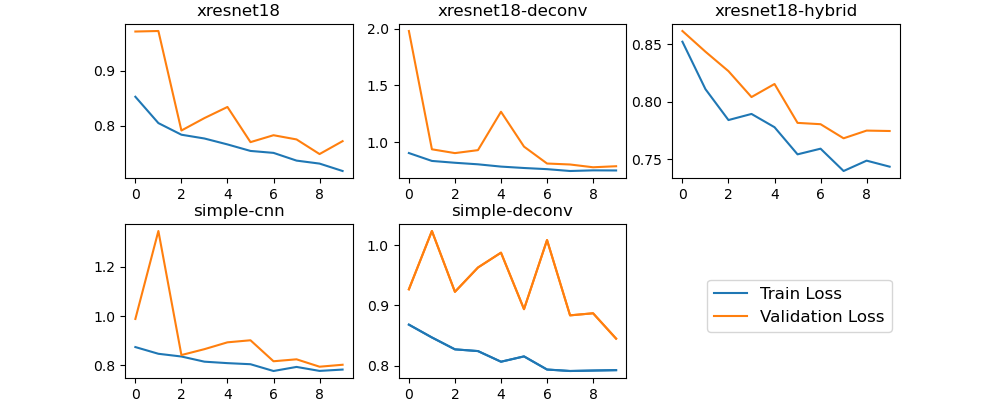

In [127]:
%matplotlib widget
fig = plt.figure(figsize=(10, 4), dpi=100)
subfigs = fig.subfigures(2,1, wspace=0, hspace=0)
ax_xresnet = subfigs[0].subplots(1, 3)
ax_simp = subfigs[1].subplots(1, 3)

xresnet_names = [model_name for model_name in model_names if 'xresnet' in model_name]
for i, model_name in enumerate(xresnet_names):
    ax_xresnet[i].plot(range(epochs), model_lossvepoch[model_name+'_trainloss'], '-', color='C0')
    ax_xresnet[i].plot(range(epochs), model_lossvepoch[model_name+'_validloss'], '-', color='C1')
    ax_xresnet[i].set_title(model_name, fontsize=12)

simple_names = [model_name for model_name in model_names if 'simple' in model_name]
for i, model_name in enumerate(simple_names):
    ax_simp[i].plot(range(epochs), model_lossvepoch[model_name+'_trainloss'], '-', color='C0')
    ax_simp[i].plot(range(epochs), model_lossvepoch[model_name+'_validloss'], '-', color='C1')
    if i == 1:
        ax_simp[i].plot(range(epochs), model_lossvepoch[model_name+'_trainloss'], '-', label='Train Loss', color='C0')
        ax_simp[i].plot(range(epochs), model_lossvepoch[model_name+'_validloss'], '-', label='Validation Loss', color='C1')
    ax_simp[i].set_title(model_name, fontsize=12)

ax_simp[2].axis('off')

fig.legend(loc='lower right', bbox_to_anchor=(0.9, 0.15), bbox_transform=fig.transFigure, fontsize=12)

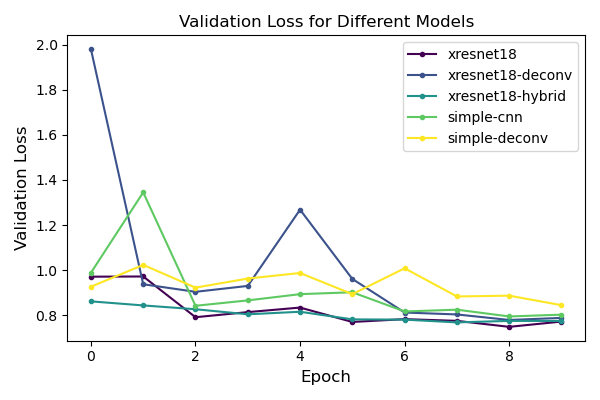

In [138]:
%matplotlib widget
fig, ax = plt.subplots(1,1, figsize=(6, 4), dpi=100)
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(model_names)))
for i, model_name in enumerate(model_names):
    ax.plot(range(epochs), model_lossvepoch[model_name+'_validloss'], '.-', label=model_name, color=colors[i])

ax.set_title('Validation Loss for Different Models', fontsize=12)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Validation Loss', fontsize=12)
ax.legend(loc='upper right', fontsize=10)
fig.tight_layout()

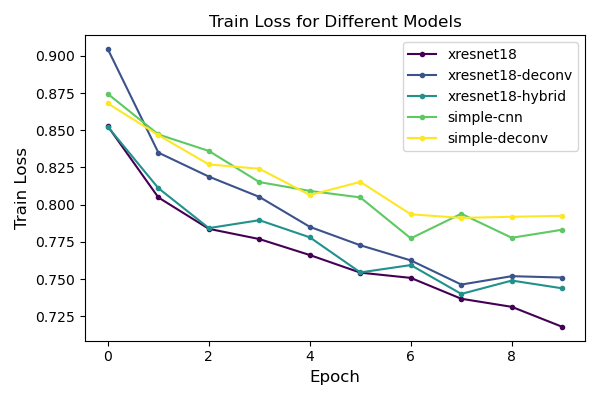

In [137]:
%matplotlib widget
fig, ax = plt.subplots(1,1, figsize=(6, 4), dpi=100)
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(model_names)))
for i, model_name in enumerate(model_names):
    ax.plot(range(epochs), model_lossvepoch[model_name+'_trainloss'], '.-', label=model_name, color=colors[i])

ax.set_title('Train Loss for Different Models', fontsize=12)
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Train Loss', fontsize=12)
ax.legend(loc='upper right', fontsize=10)
fig.tight_layout()